# Part II - ANALYZING FORD GOBIKE SYSTEM DATA
## by Paul Wainaina


## Investigation Overview

In this investigation I want to focus on the distribution of some variables present in the Forgo Bike dataset which include the user-type(Subscriber, Customer), gender(Male, Female, Other), age and how they relate with the trip duration of forgo bike in San Francisco. 

## Dataset Overview

The dataset is from a sharing bicycle system called Ford GoBike. It is located in San Francisco bay area. 

The dataset contains information about the GoBike system rides and it has around 183412 records and 18 features. I will focus on accessing the dataset to perform data wrangling and data visualization analysis process. 


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [6]:
# load in the dataset into a pandas dataframe
bikes_df= pd.read_csv('201902-fordgobike-tripdata.csv')

In [7]:
#Data wrangling process
#Make a copy of the original data 
bikes= bikes_df.copy() 

#Convert the start time and end time datatype from string to datatime
bikes['start_time'] = pd.to_datetime(bikes['start_time'])
bikes['end_time'] = pd.to_datetime(bikes['end_time'])


In [8]:
# Extract the month, day and hour from start_time to form new columns 
bikes['start_hour'] = bikes.start_time.dt.hour
bikes['start_day'] = bikes.start_time.dt.day
bikes['start_day_of_week'] = bikes['start_time'].dt.day_name()
bikes['end_day'] =bikes.end_time.dt.day
bikes['end_day_of_week'] = bikes['end_time'].dt.day_name()
bikes['end_hour'] = bikes.end_time.dt.hour
bikes['month'] = bikes.start_time.dt.month_name()

bikes.drop('end_time', axis=1, inplace=True)
bikes.drop('start_time', axis=1, inplace=True)
# convert seconds to minutes
bikes['duration_minutes'] = bikes['duration_sec']/60

In [9]:
#Drop unwanted columns 
bikes.drop(['start_station_latitude','start_station_longitude', 'end_station_latitude',
            'end_station_longitude'], axis=1, inplace=True)
#drop missing values
bikes.dropna(inplace=True)

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## USER-TYPE DISTRIBUTION
Most users in the bike sharing system is the subscriber with 90.5% as compared to the customer with 9.5%. This means that most bike users have subscribed to the bike sharing system. 

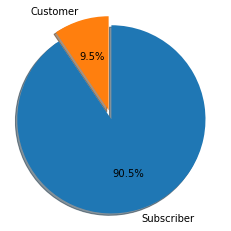

In [10]:
# plot a pie chart
user_category = bikes['user_type'].value_counts()
plt.pie(user_category, explode =  (0, 0.1), labels = user_category.index, shadow = True, startangle = 90,
        counterclock = False, autopct='%1.1f%%');
plt.axis('square')
plt.show()

## GENDER DISTRIBUTION

In this dataset we will be comparing three entries for gender, female, male and other. The main focus is to determine the gender distribution in the bike sharing system. 

Males use the bikes more as compared to females and other gender. Over 120000 users are males.

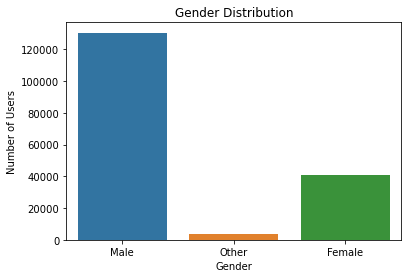

In [11]:
# barplot of gender usage
sb.countplot(data = bikes, x = 'member_gender')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Number of Users')
plt.show()

## DISTRIBUTION OF THE TRIP DURATION IN MINUTES

The trip duration represents the time taken to complete a trip. Analysing the trip duration taken by users in the forgo bike bike sharing system, most users tend to spend less than 30 minutes for a trip. 

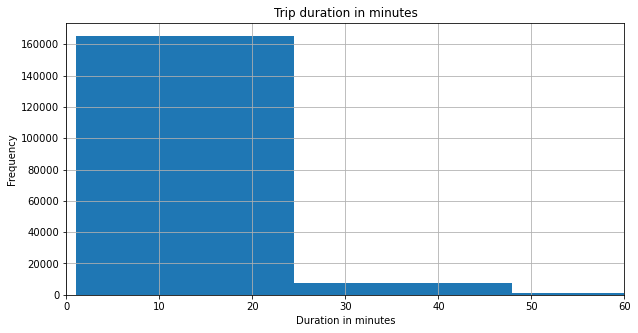

In [13]:
plt.figure(figsize = [10,5])
bikes['duration_minutes'].hist(bins=60)
plt.xlim(0, 60)
plt.xlabel('Duration in minutes')
plt.ylabel('Frequency')
plt.title("Trip duration in minutes")

plt.show()

### TRIP DURATION FOR EACH GENDER IN MINUTES
Males take a shorter trip duration compared to the other gender. 

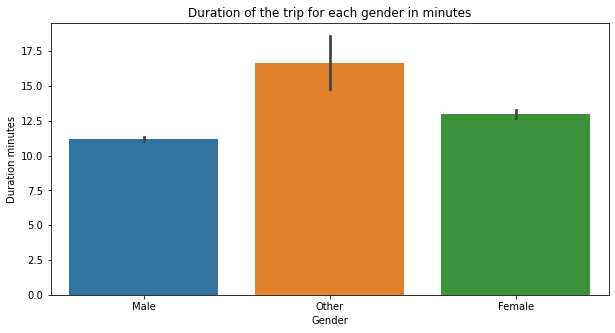

In [14]:
plt.figure(figsize = (10,5))

sb.barplot(data = bikes, x = "member_gender", y = "duration_minutes")

plt.xlabel('Gender')

plt.ylabel('Duration minutes')


plt.title("Duration of the trip for each gender in minutes")

plt.show()

### Generate Slideshow
Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show.  

In [ ]:
# The command below will generate the HTML slideshow. 
!jupyter nbconvert Part_II_slide_deck_template.ipynb --to slides --post serve --no-input --no-prompt

> In the classroom workspace, the generated HTML slideshow will be placed in the home folder. 

> In local machines, the command above should open a tab in your web browser where you can scroll through your presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent slide. Make sure you remove all of the quote-formatted guide notes like this one before you finish your presentation! At last, you can stop the Kernel. 